In [1]:
%load_ext autoreload
%autoreload 2
import os
# Set environment variables
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = ".99"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import jax
# from jax import config
# config.update('jax_enable_x64', True)
# Check JAX configuration
devices = jax.local_devices()
print(devices)
print(jax.default_backend())
print(jax.devices())
import sys
# Add custom path
sys.path.append("/pchem-data/meuwly/boittier/home/pycharmm_test/src")
# from model import EF
# from loss import dipole_calc
# from  training import train_model # from model import dipole_calc
import jax
import optax
import e3x
# from dcmnet.analysis import create_model_and_params
# from data import prepare_batches, prepare_datasets
import numpy as np

import orbax
from orbax.checkpoint import PyTreeCheckpointer
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()
import jax
import jax.numpy as jnp
import flax.linen as nn
import networkx as nx
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import os
# Set environment variables
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = ".99"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import jax
# from jax import config
# config.update('jax_enable_x64', True)
# Check JAX configuration
devices = jax.local_devices()
print(devices)
print(jax.default_backend())
print(jax.devices())
import sys
# Add custom path
sys.path.append("/pchem-data/meuwly/boittier/home/pycharmm_test/src")
# from model import EF
# from loss import dipole_calc
# from  training import train_model # from model import dipole_calc
import jax
import optax
import e3x
# from dcmnet.analysis import create_model_and_params
# from data import prepare_batches, prepare_datasets
import numpy as np
from physnetjax.models.model import EF
from physnetjax.training.loss import dipole_calc
from  physnetjax.training.training import train_model # from model import dipole_calc
from physnetjax.data.data import prepare_batches, prepare_datasets
import orbax
from orbax.checkpoint import PyTreeCheckpointer
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()
from pathlib import Path
# from physnetjax.analysis import *
import polars as pl
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from tensorflow.python.summary.summary_iterator import summary_iterator

[CudaDevice(id=0)]
gpu
[CudaDevice(id=0)]
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[CudaDevice(id=0)]
gpu
[CudaDevice(id=0)]


2024-12-17 17:37:40.622816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734453460.645083 1091479 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734453460.652029 1091479 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:

data_key, train_key = jax.random.split(jax.random.PRNGKey(42), 2)


NATOMS = 30
files = [Path('/pchem-data/meuwly/boittier/home/pycharmm_test/data/basepairs/at_prod.npz'),
 Path('/pchem-data/meuwly/boittier/home/pycharmm_test/data/basepairs/at_reag.npz'),
 Path('/pchem-data/meuwly/boittier/home/pycharmm_test/data/basepairs/at_retune.npz'),
 Path('/pchem-data/meuwly/boittier/home/pycharmm_test/data/basepairs/rattle_neb_at.npz'),
 Path('/pchem-data/meuwly/boittier/home/pycharmm_test/data/basepairs/rattle_neb_gc.npz')]


train_data, valid_data = prepare_datasets(
    data_key,
    1220,
    20,
    files,
    clip_esp=False,
    natoms=NATOMS,
    clean=False,
    subtract_atom_energies=True,
    verbose=True,
    #    data_key, 27, 20, files, clip_esp=False, natoms=NATOMS, clean=False
)

ntest = len(valid_data["E"]) // 2
test_data = {k: v[ntest:] for k, v in valid_data.items()}
valid_data = {k: v[:ntest] for k, v in valid_data.items()}


2024-12-17 17:37:43.743360: W external/xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.6.77. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


                             at_prod.npz                              
┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ N      ┃ E      ┃ Q      ┃ Z         ┃ R            ┃ F            ┃
┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ (100,) │ (100,) │ (100,) │ (100, 30) │ (100, 30, 3) │ (100, 30, 3) │
└────────┴────────┴────────┴───────────┴──────────────┴──────────────┘

                             at_reag.npz                              
┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ N      ┃ E      ┃ Q      ┃ Z         ┃ R            ┃ F            ┃
┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ (100,) │ (100,) │ (100,) │ (100, 30) │ (100, 30, 3) │ (100, 30, 3) │
└────────┴────────┴────────┴───────────┴──────────────┴──────────────┘

                         at_retune.npz                          
┏━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ N     ┃ E     ┃ Q     ┃ Z        ┃ R           ┃ F           ┃
┡━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ (49,) │ (49,) │ (49,) │ (49, 30) │ (49, 30, 3) │ (49, 30, 3) │
└───────┴───────┴───────┴──────────┴─────────────┴─────────────┘

                          rattle_neb_at.npz                           
┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ N      ┃ E      ┃ Q      ┃ Z         ┃ R            ┃ F            ┃
┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ (500,) │ (500,) │ (500,) │ (500, 30) │ (500, 30, 3) │ (500, 30, 3) │
└────────┴────────┴────────┴───────────┴──────────────┴──────────────┘

                          rattle_neb_gc.npz                           
┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ N      ┃ E      ┃ Q      ┃ Z         ┃ R            ┃ F            ┃
┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ (500,) │ (500,) │ (500,) │ (500, 30) │ (500, 30, 3) │ (500, 30, 3) │
└────────┴────────┴────────┴───────────┴──────────────┴──────────────┘

dataR (1249, 30, 3)
dataE [-25027.4488671  -25027.55289115 -25027.39683495 -25027.34291575
 -25028.15620333 -25027.75680429 -25027.8270321  -25028.42203508
 -25027.35088833 -25027.2374794 ]
dataE [-96.72043875 -96.8244628  -96.66840659 -96.61448739 -97.42777498
 -97.02837594 -97.09860374 -97.69360673 -96.62245998 -96.50905105]
Q 1 (100,) 100
Q (1249,)


In [3]:
data_keys = ("R", "Z", "F", "E", "D", "N", "dst_idx", "src_idx", "batch_segments")

batch_size = 10
test_batches = prepare_batches(data_key, test_data, batch_size,
                              num_atoms=NATOMS, 
                              data_keys=data_keys)

train_batches = prepare_batches(data_key, train_data, batch_size,
                              num_atoms=NATOMS, 
                              data_keys=data_keys)

valid_batches = prepare_batches(data_key, valid_data, batch_size,
                              num_atoms=NATOMS, 
                              data_keys=data_keys)

# params = pd.read_pickle("/pchem-data/meuwly/boittier/home/pycharmm_test/checkpoints/diox-q3.2.pkl")
# for _ in test_batches[0].keys():
#     print(_, test_batches[0][_].shape)
# valid_batches

In [4]:
# valid_batches[0]

In [20]:
combined = test_batches+ valid_batches #+ train_batches
len(combined)

2

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])


                                                 Model Attributes                                                  
┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ charges ┃ cutoff ┃ features ┃ max_atomi… ┃ max_degree ┃ n_res ┃ natoms ┃ num_basis_… ┃ num_itera… ┃ total_char… ┃
┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ False   │ 6.0    │ 248      │ 11         │ 1          │ 3     │ 30     │ 30          │ 4          │ 0           │
└─────────┴────────┴──────────┴────────────┴────────────┴───────┴────────┴─────────────┴────────────┴─────────────┘

                                                  Last Checkpoint                                                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Checkpoint                                         ┃ name      ┃ epoch ┃ best_loss ┃ Save Time                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ /pchem-data/meuwly/boittier/home/pycharmm_test/ck… │ epoch-277 │ 277   │ 3.21168   │ 2024-12-17 17:31:47.504428 │
└────────────────────────────────────────────────────┴───────────┴───────┴───────────┴────────────────────────────┘

EF(
    # attributes
    features = 248
    max_degree = 1
    num_iterations = 4
    num_basis_functions = 30
    cutoff = 6.0
    max_atomic_number = 11
    charges = False
    natoms = 30
    total_charge = 0
    n_res = 3
    zbl = False
    debug = False
    efa = False
)


2it [00:03,  1.59s/it]


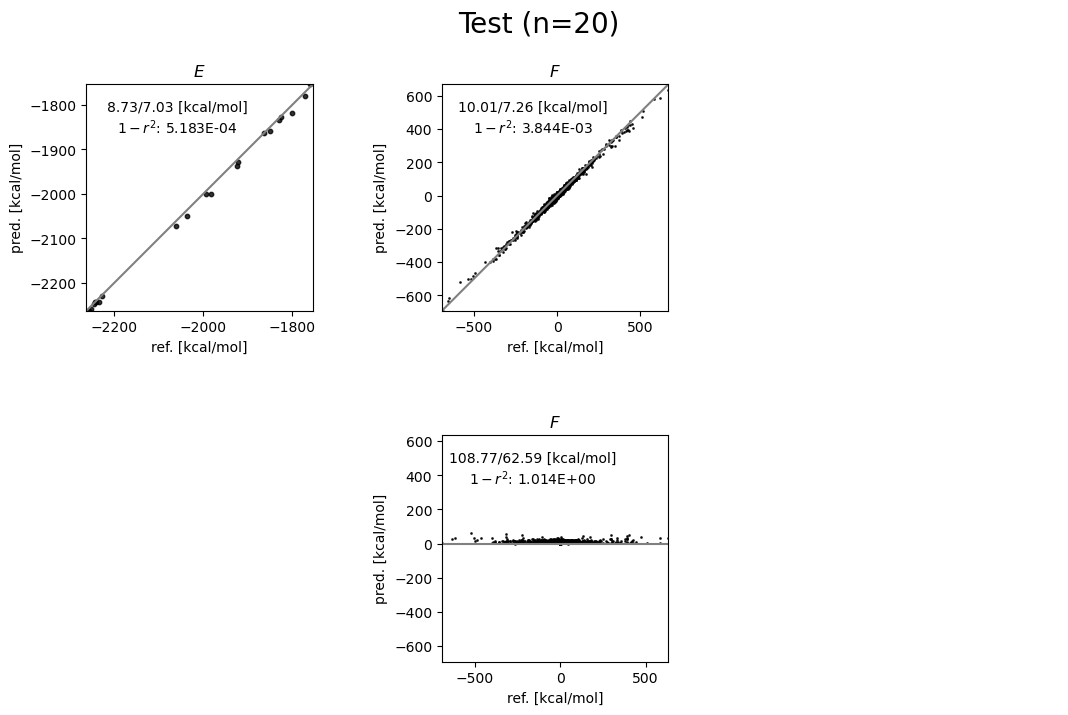

In [22]:

from physnetjax.restart.restart import get_last, get_files, get_params_model
from physnetjax.analysis.analysis import plot_stats
restart = "/pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/basepairs-21d6f048-cc54-45a2-960d-4351aa358065/"
restart = get_last(restart)

params,model = get_params_model(restart)
model.natoms = 30
model.efa = False
print(model)

output = plot_stats(combined[:], model, params, _set="Test", 
               do_kde=False, batch_size=batch_size)

In [141]:
from ebc.Clustering import EBC
energies = np.array([_["E"] for _ in combined])
atomic_numbers = np.array([_["Z"] for _ in combined])

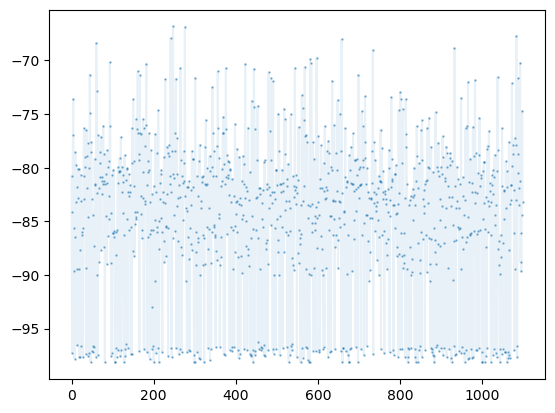

In [142]:
plt.plot(np.arange(energies.shape[0]), energies.flatten(), alpha=0.1)
plt.scatter(np.arange(energies.shape[0]), energies.flatten(), alpha=0.5, s=0.51)

(array([220.,   1.,  58., 158., 195., 255., 129.,  44.,  30.,  10.]),
 array([-98.16121674, -95.0280304 , -91.89484406, -88.76165771,
        -85.62847137, -82.49528503, -79.36209106, -76.22890472,
        -73.09571838, -69.96253204, -66.8293457 ]),
 <BarContainer object of 10 artists>)

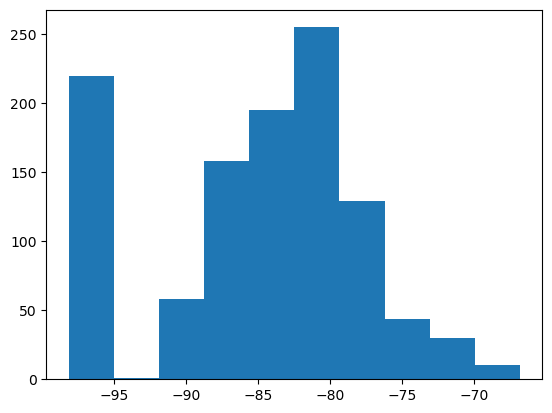

In [143]:
plt.hist(energies.flatten())

(1100,)
(1100, 1)


(array([104., 160., 350., 187., 108.,  84.,  66.,  18.,  16.,   7.]),
 array([-6.91766357, -4.76262379, -2.60758352, -0.45254326,  1.70249653,
         3.85753632,  6.01257706,  8.16761684, 10.32265663, 12.47769737,
        14.63273621]),
 <BarContainer object of 10 artists>)

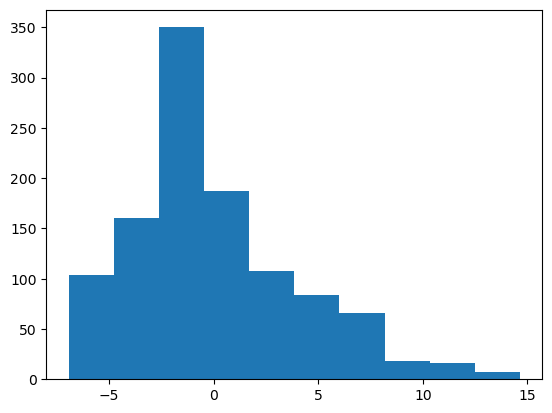

In [144]:
from physnetjax.analysis.analysis  import remove_mean_from_multimodal_distribution

energies_mean_removed = remove_mean_from_multimodal_distribution(energies.flatten())

plt.hist(energies_mean_removed)

<Axes: >

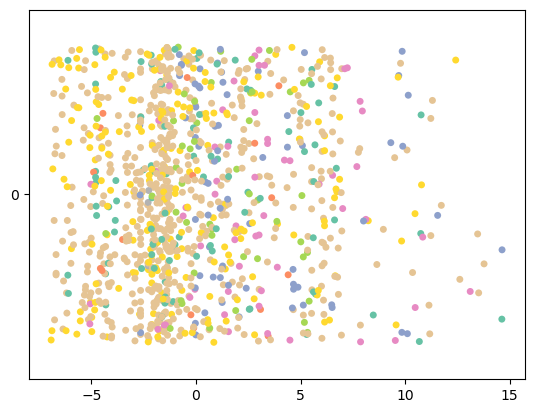

In [145]:
import seaborn as sns
sns.stripplot(energies_mean_removed, c=ebc.state_labels, cmap="Set2", jitter=0.4, dodge=True, orient="h")


In [146]:
dir(ebc)
# ebc.proto_labels
ebc.state_labels.shape

(1100,)

In [178]:
from physnetjax.analysis.analysis import *
from physnetjax.analysis.povray_tool import *

In [218]:
species = np.unique(np.concatenate(atomic_numbers))
# Apply PCA
labels = None
soap_descr, ase_atoms = compute_soap_descriptors(
    coordinates, atomic_numbers, species, 
    r_cut=10.0, n_max=16, l_max=4, sigma=1.0)

1100it [00:03, 346.10it/s]


In [219]:
reduced_data_pca, model_pca = process_data(soap_descr, apply_pca, n_components=2)

Flattening descriptors...
Scaling data...
Applying apply_pca...


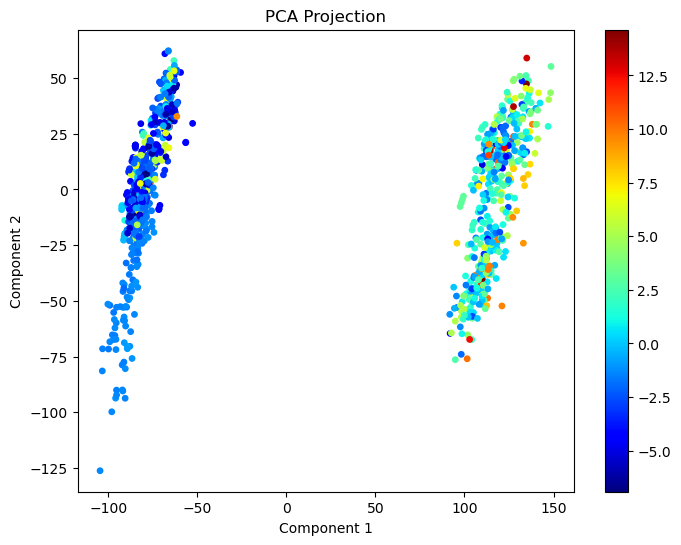

In [220]:
visualize_projection(reduced_data_pca, labels,
                     title="PCA Projection", c=energies_mean_removed)

Using 162 components, explaining 100.0% of variance
Proto radius set to:  4.49617710673721
Using 389 proto clusters.
The gap between the two largest eigenvalues is 2.919886554764162e-14.
Your graph might consist of multiple disconnected components which can result in unexpected behaviour.
Consider increasing the number of knn and/or the temperature.
Using the eigenvector corresponding to an eigenvalue of 1.0000000000000113.


/tmp/ipykernel_997429/2128389353.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cluster_members_energy = {_:float(energies_mean_removed[_]) for _ in range(int(ebc._proto_2D.shape[0]))}


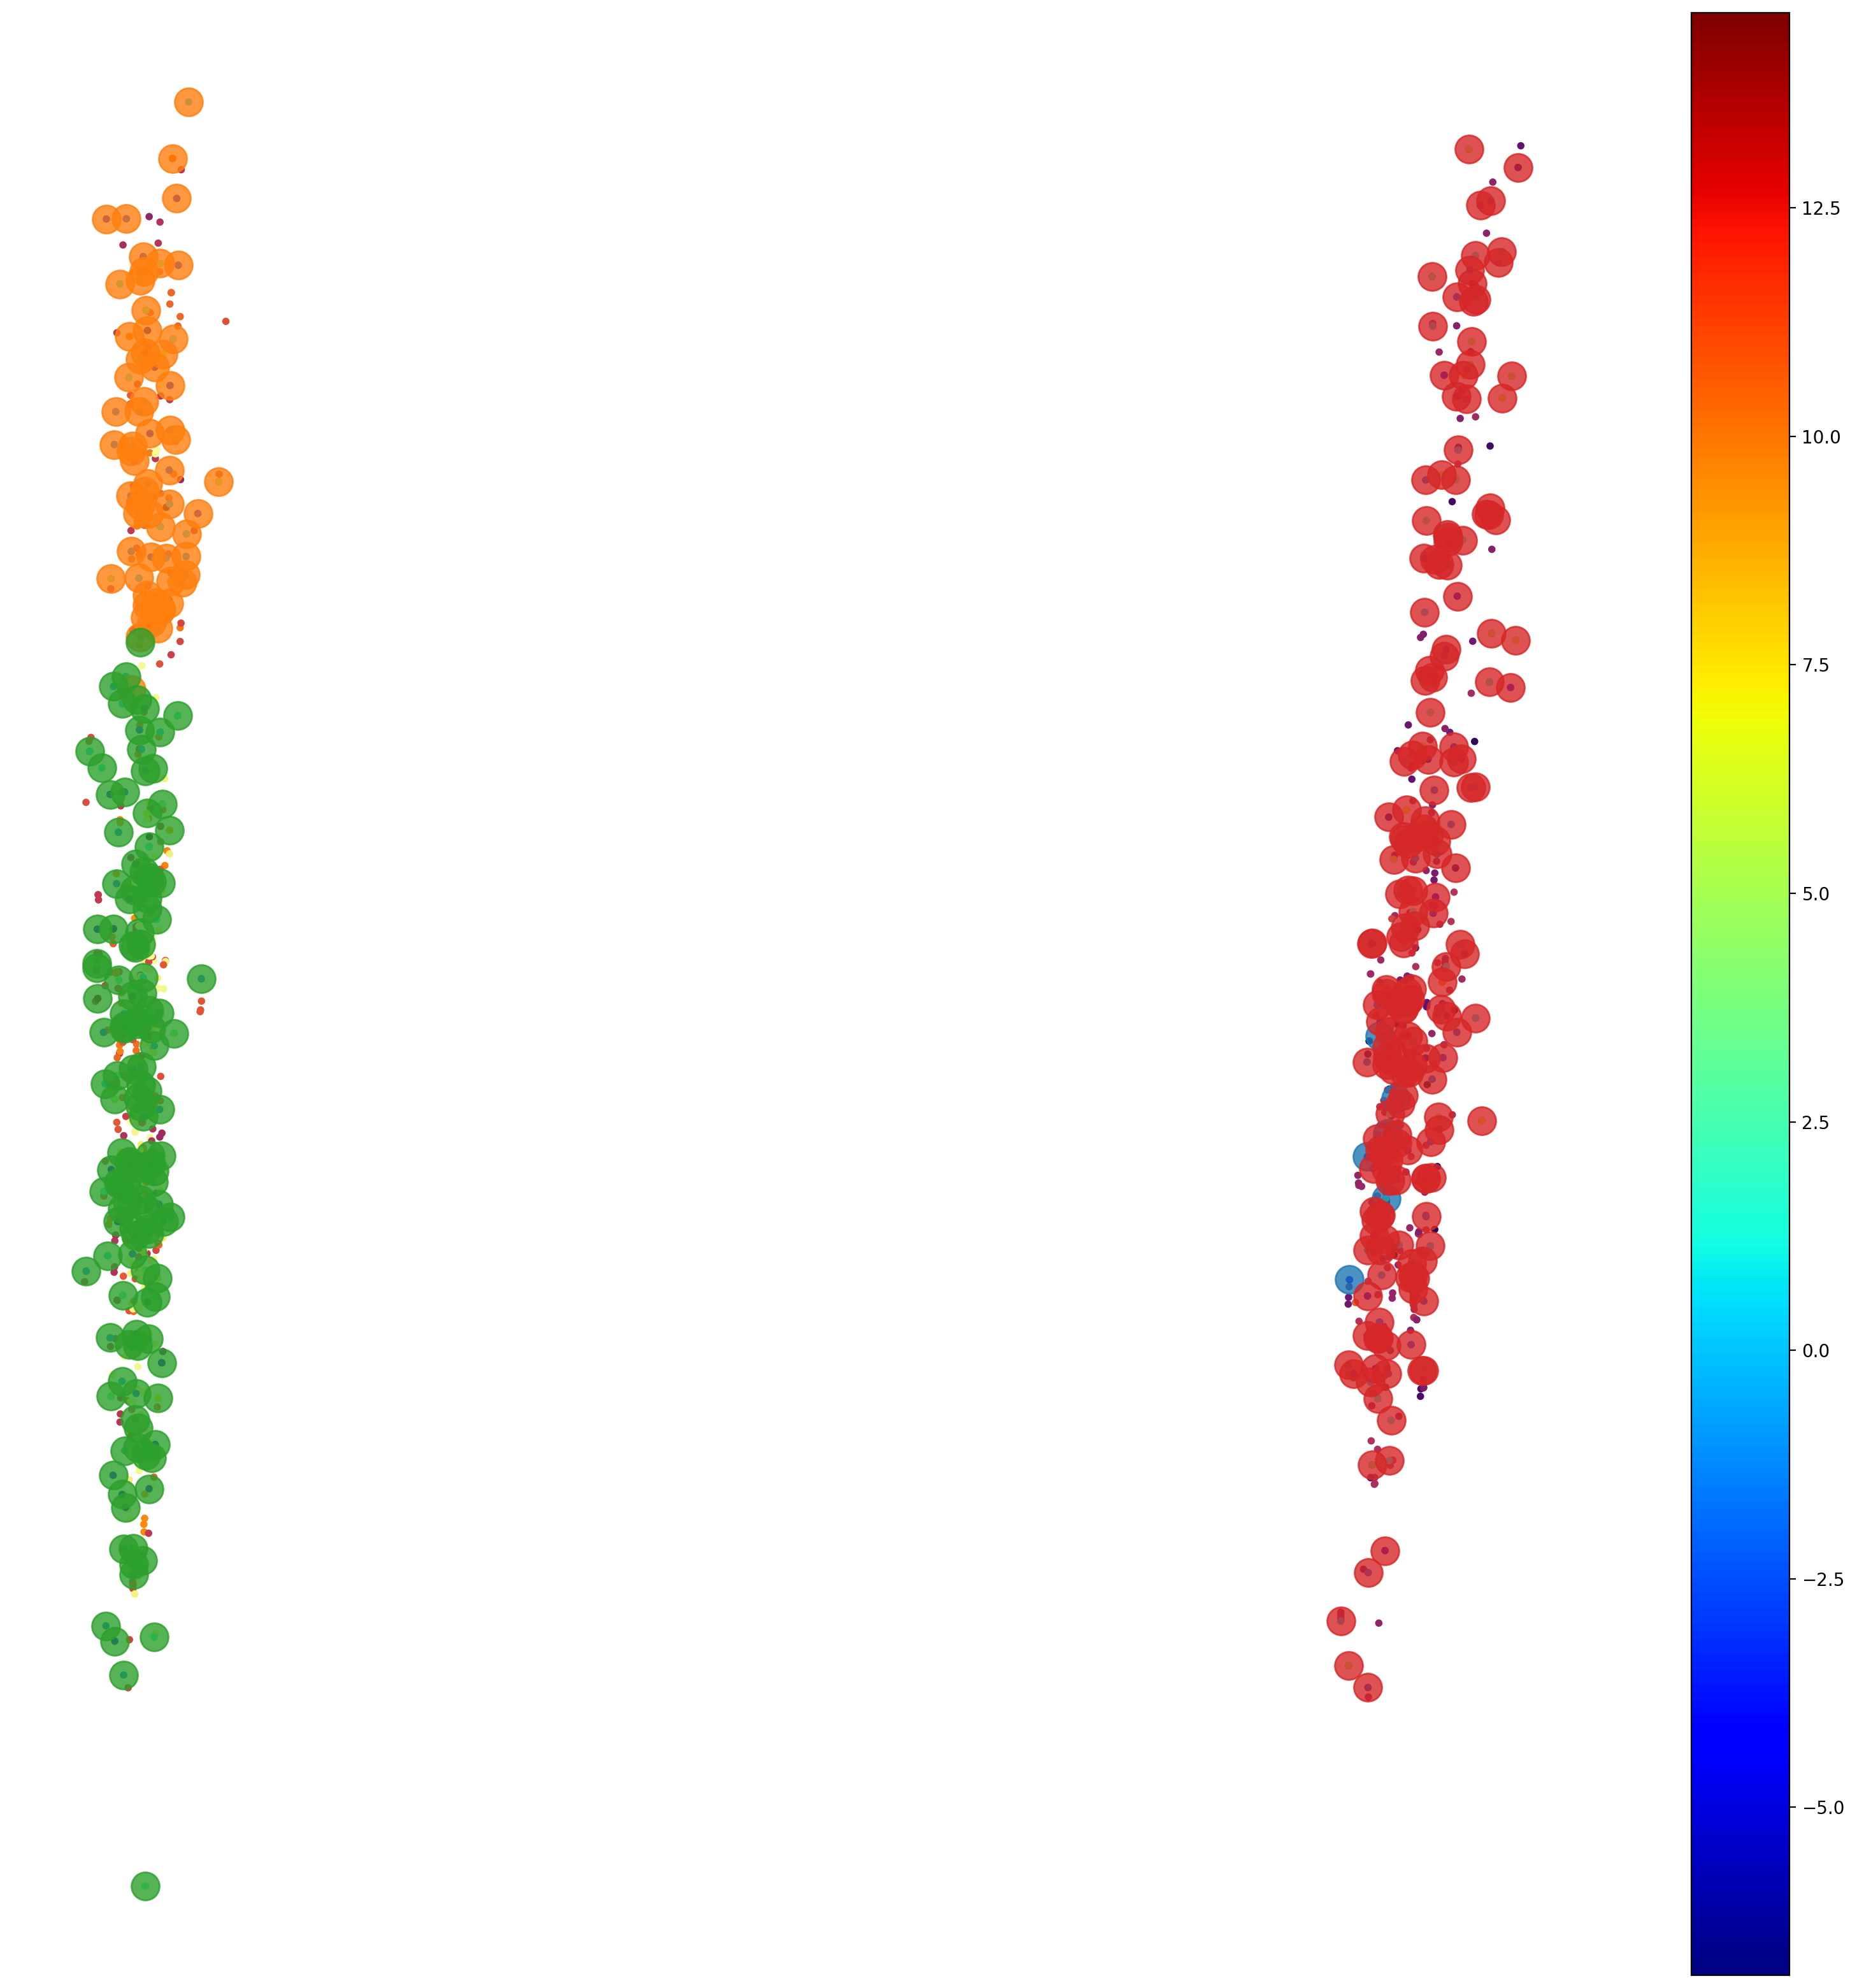

In [223]:
n = 4
ebc = EBC(n_clusters=n) 
labels = ebc.fit_transform(soap_descr[:,:], energies)
_ = ebc.show()
# plt.show()
cluster_members_energy = {_:float(energies_mean_removed[_]) for _ in range(int(ebc._proto_2D.shape[0]))}
_cluster_members_energy = np.array([v for v in 
                                    cluster_members_energy.values()])
# plt.scatter(ebc._proto_2D[:, 0], ebc._proto_2D[:, 1], alpha=0.1, c=errors, zorder=-1)
s = plt.scatter(ebc._proto_2D[:, 0][::], ebc._proto_2D[:, 1][::], alpha=1, c=[cluster_members_energy[_]
                for _ in range(int(ebc._proto_2D.shape[0]))], 
                vmin=_cluster_members_energy.min(), vmax=_cluster_members_energy.max(), 
                zorder=-1, cmap="jet",s=10)
plt.colorbar(s)
plt.show()

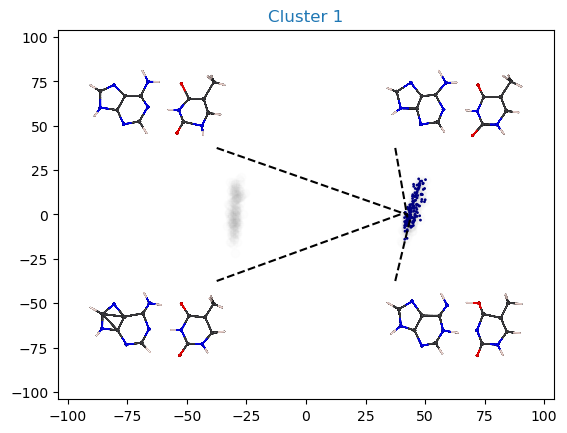

Adding bond between 15 22
Adding bond between 17 24


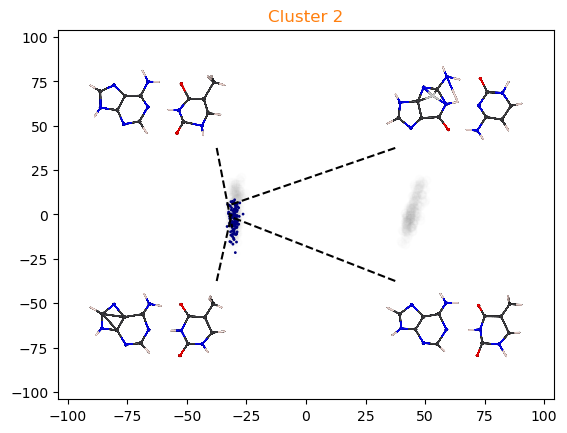

Adding bond between 17 24
Adding bond between 17 24
Adding bond between 15 22


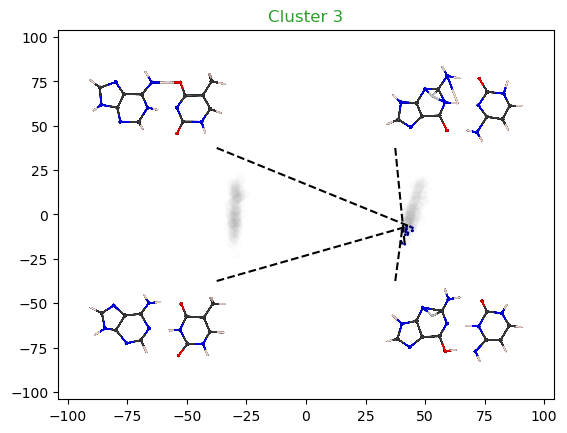

Adding bond between 17 24
Adding bond between 17 24
Adding bond between 17 24
Adding bond between 17 24


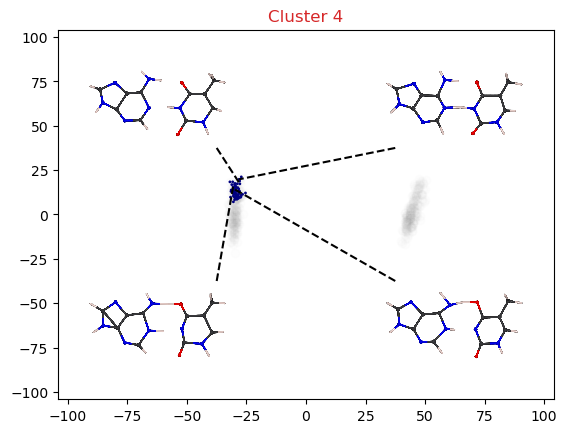

True

In [222]:
annotate_ebc(ebc, energies, ase_atoms)